# Homework 1: Building ML Regression Model For Predictions


Welcome to the first homework task.

**Instructions:**

- We highly recommend you use this ***'Codio'*** platform to finish this assignment. If you download this file, don't upload a new ipynb file with your answers.
- Please keep in mind that your answer should be typed in the cell that are marked with "**Q**".   
  You can break your code into different cells or create new cells to test your code, but your final output/answers must be typed in the marked cell.   
- After you finishing the assignment, please check whether you have saved your assignment. You can save assignment using CLTR-S or File -> Save Checkpoint
- Once you complete your assignment you can submit by clicking on Education -> Marked as Complete 


**IMPORTANT:**
- You are welcome to debug any way you wish, but you cannot modify the debugging examples. If they do not work, then you must try to figure out how to make them work. Those debugging examples are important! Run them before grading your problems too.
- Follow the directions accurately, especially when we ask naming conventions, random seeds or shuffling. 

**You will learn:**
 - In this homework, we are going to build a linear regression model on housing prices dataset. We want to use metrics about Real Estate to predict the price per square foot of the house. You will first build a simple model with one parameter, which will create a one dimensional linear regression that we can visualize. Afterwards, you will improve on the regression model to include more paramters. 
 

# 1. Load data into a Pandas DataFrame (14 points)

We begin by loading the data. Read the csv file, 'RealEstate.csv', and store this as a data frame in the variable `data`.  When dealing with a large dataset, you may get a `DtypeWarning`. For our case, this is a small dataset.



In [66]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [67]:
# Q 
# Create variable data
# Your answer should be in this cell 

# YOUR CODE HERE
data = pd.read_csv('RealEstate.csv')

In [68]:
# This is the tester coad to load out file
print(data.head())

   No  Transaction date  House age  Distance to the nearest MRT station  \
0   1          2012.917       32.0                             84.87882   
1   2          2012.917       19.5                            306.59470   
2   3          2013.583       13.3                            561.98450   
3   4          2013.500       13.3                            561.98450   
4   5          2012.833        5.0                            390.56840   

   Number of convenience stores  Latitude  Longitude  House price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1  


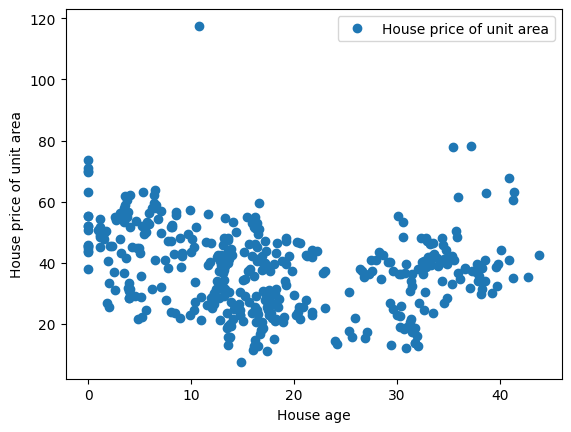

In [69]:
# This is to visualize the data of number of words and shares
# This shouldnt look like a good linear plot. Though we will 
# use this for now.
data.plot(x='House age', y='House price of unit area', style='o')  
plt.xlabel('House age')  
plt.ylabel('House price of unit area')  
plt.show()

In [70]:
# This cell is used for grading that the data is correctly loaded . 

# Extract the Data Features (14 points)

Now, we are going to start with the two dimensional comparison of House age and House price per unit area. Store in the variable `selected_data` the new data frame with the columns of House age and House price per unit area.

`selected_data` should also be a data frame.  

In [71]:
# Q
# Create variable selected_data.
# Your answer should be in this cell 
# YOUR CODE HERE
selected_data = data[['House age', 'House price of unit area']]


In [72]:
print(selected_data)


     House age  House price of unit area
0         32.0                      37.9
1         19.5                      42.2
2         13.3                      47.3
3         13.3                      54.8
4          5.0                      43.1
..         ...                       ...
409       13.7                      15.4
410        5.6                      50.0
411       18.8                      40.6
412        8.1                      52.5
413        6.5                      63.9

[414 rows x 2 columns]


In [73]:
# This cell is used for grading the selected_data data frame. 

# Train and Test Split (14 points)

Use the **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** &nbsp;function in sk-learn to split the dataset.
 
Use `from sklearn.model_selection import train_test_split` to import the **train_test_split** function from sk-learn.

Now we need to split the data for training and testing. Training data will be used to build our regression model, and testing will be used to see how good our model is. Never touch the testing data until the very end. Use a 20% test to train split ratio.

So here, we need 4 variables with the respective data split. x_train, y_train, x_test, y_test.

x_train, x_test - should be pandas data frames

y_train, y_test - should be pandas series

#### Use random_state=27 !!!  


In [74]:
# Q
# Create variables x_train, x_test, y_train, y_test.
# Your answer should be in this cell
# YOUR CODE HERE
X = selected_data[['House age']]  # DataFrame with 'House age' column
y = selected_data['House price of unit area']  # Series with 'House price of unit area'

# Splitting the data into training and testing sets with a 20% test size
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [75]:
print(type(x_train), type(y_train), type(x_test), type(y_test))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("Percentage of split: {}%".format(100 * x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(331, 1) (331,) (83, 1) (83,)
Percentage of split: 20.04830917874396%


In [76]:
# This cell is used for autograding. 

# Build a Linear Regression Model using sklearn (14 points)

Build a function called `generateModel` that when given a tuple of training data, it fits a linear model to the data. It should return the `LinearRegression` object from `sklearn`. Note, it must be fitted to some given data, and must return the model. We will use this function to fit our data. The paramters passed are `x,y` , where x is the dependent variables in the model and y is the target variable.

In [77]:
# Q
# Create the function generateModel(x,y) -> Return Type = sklearn.linear_model.LinearRegression
# Your answer should be in this cell
def generateModel(x,y):
# YOUR CODE HERE
    model = LinearRegression()
    model.fit(x, y)
    return model


In [78]:
print(x_train.columns)

Index(['House age'], dtype='object')


In [79]:
# This test prints the equation of your model.

regressor = generateModel(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

eq = "House price of unit area = "
i = 0
for col in x_train.columns:
    eq += str(regressor.coef_[i])[:8] + "({}) + ".format(col)
    i+=1
eq += str(regressor.intercept_)[:8]

print(eq)

House price of unit area = [-0.2413(House age) + [41.9435


In [80]:
# This cell is used for autograding. 

# Predict Values for Test Set Using Regression Model and Report the Square Error(14 points)

Now that we have a working LinearRegression model, we can start using it to spit outputs and measure how good it is. Create two variables called `predicted_values` and `error`. 

`predicted_values` should hold the values predicted for the test set.
`error` should measure the **[Mean Square Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)** of our predictions.


In [81]:
# Q
# Create variables predicted_values, error.
# Your answer should be in this cell
# YOUR CODE HERE
predicted_values = regressor.predict(x_test)
error = metrics.mean_squared_error(y_test, predicted_values)


c:\Users\ray81\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MSE: 161.8489082214612


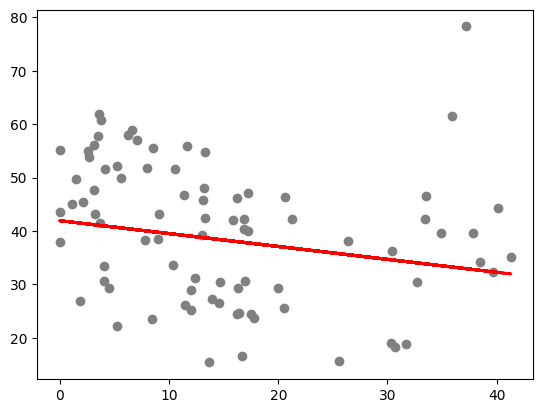

In [82]:
#This tests your predictions and visualizes them
print("MSE: {}".format(error))
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, predicted_values, color='red', linewidth=2)
plt.show()

In [83]:
# This cell is used for autograding. 

# Higher Dimensional Regression (30 points)

As we can see, the linear fit is not quite good enough. For the purpose of this assignment, we want you to practice working with the coding language and fitting different parameters. One option is indeed to remove the outlier contributing to the big MSE, which would suffice, but lets assume we can't do that. We either need a different fit, or different dimensions to compare. Lets do the latter. We can extend everything now to a higher dimensional situation. We can include more parameters, or different ones. Lets use the former: more parameters (which also means different, technically).

For this, you will rebuild everything but now with a deeper LinearRegression model. You've done all the steps already, you'll just have to make small tweeks. Do not resplit the data. While there is a thing called validation split, we will not be doing this. You are however advised to look up what validation splitting is, as in practice we have train/validation/test split. 

If you resplit the data between train/test each time for repetitive testing, then you are losing the testing set. One option is to always split such that you use the LAST 20% of the data as test, but that is statistically invalid since you incorporate some bias - it must be random. Thus, you are just doing a train/validation set and over fitting your model highly. 

Therefore, you need to figure out how to add back in the columns to your x_train and x_test. As a hint, notice how (if you truly did the splitting correctly) each data entry has an index tag. These tags can be used to lookup the original data dataframe and pull the extra columns. You may need to refer to extra documentation for this. Like most things in computer science, feel free to research as much as you need!



Please make the following variables. 

`hd_features` - a list of strings of the features (columns) used for the dependent variables. 
The target is still Housing price of unit area.

`hd_x_train` - the column updated training data - data frame.

`hd_x_test` - the column updated test data - data frame. 

`hd_model` - the `LinearRegression` model with greater than 2 dimensions.

`hd_predictions` - the predicted values of this new model

`hd_error` - the MSE of the higher dimensional model




In [88]:
# Q
# Ctreate variables hd_x_train,hd_x_test,hd_model,hd_predictions,hd_error,hd_features 
# Your answer should be in this cell
hd_features=['Transaction date', 'House age','Distance to the nearest MRT station', 'Number of convenience stores','Latitude', 'Longitude']

# YOUR CODE HERE
hd_x_train = data[hd_features]
hd_y_train = data['House price of unit area']
hd_x_train, hd_x_test, hd_y_train, hd_y_test = train_test_split(hd_x_train, hd_y_train, test_size=0.2, random_state=27)
hd_model = generateModel(hd_x_train, hd_y_train)
hd_predictions = hd_model.predict(hd_x_test)
hd_error = metrics.mean_squared_error(hd_y_test, hd_predictions)

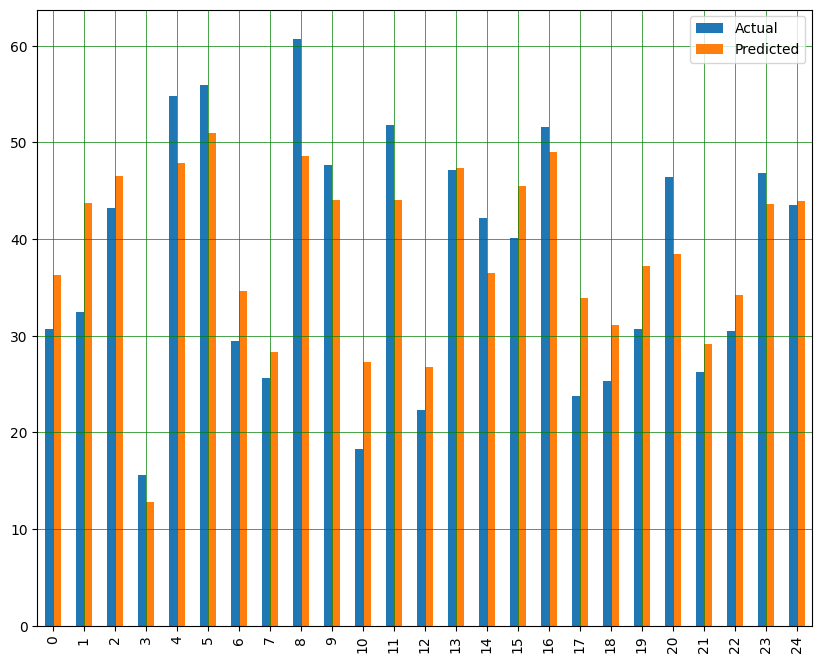

MSE =  59.471647066277136


In [89]:
#Use this if you want to visiualize your data. It might be wise to see how well you feel your MSE is.
regressor, y_pred, err, cols= (hd_model, hd_predictions, hd_error, hd_features)
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}) #A new data frame between test and predictions
df1 = df.head(25) #The number indicates how many of the first predicitons to compare to true values.
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print("MSE = ",hd_error)

In [86]:
# This cell is used for grading that hd_x_train and hd_x_test. 

In [87]:
# This cell is used for grading that hd_x_train and hd_x_test. 